In [5]:
#import modules and packages
import numpy as np
import pandas as pd
from pandas import json_normalize
import requests
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import mplsoccer as mpl
from bs4 import BeautifulSoup
import json


# Martin Odegaard per match stats

In [22]:
#scrape game attributes
#single game shots
base_url = 'https://understat.com/player/'
player = '2517'
url = base_url + player
url

'https://understat.com/player/2517'

In [23]:
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
strings = scripts[3].string


In [24]:
#strip unnecesary symbols
ind_start = strings.index("('") + 2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]

json_data = json_data.encode('utf8').decode('unicode_escape')

#convert strings to json format

data = json.loads(json_data)

data

[{'id': '310992',
  'minute': '45',
  'result': 'MissedShots',
  'X': '0.7319999694824219',
  'Y': '0.49900001525878906',
  'xG': '0.020138928666710854',
  'player': 'Martin Odegaard',
  'h_a': 'a',
  'player_id': '2517',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12024',
  'h_team': 'Valencia',
  'a_team': 'Real Sociedad',
  'h_goals': '1',
  'a_goals': '1',
  'date': '2019-08-17 18:00:00',
  'player_assisted': 'Adnan Januzaj',
  'lastAction': 'Pass'},
 {'id': '313078',
  'minute': '79',
  'result': 'MissedShots',
  'X': '0.7830000305175782',
  'Y': '0.33099998474121095',
  'xG': '0.07448144257068634',
  'player': 'Martin Odegaard',
  'h_a': 'a',
  'player_id': '2517',
  'situation': 'DirectFreekick',
  'season': '2019',
  'shotType': 'LeftFoot',
  'match_id': '12040',
  'h_team': 'Mallorca',
  'a_team': 'Real Sociedad',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2019-08-25 16:00:00',
  'player_assisted': None,
  'lastAction': 'Standard

In [25]:
data_arsenal = {}
for i in range(len(data)):
    if data[i]['season'] == '2021':
        for dict in data:
            data_arsenal[i] = data[i]
        


In [26]:
# create dataframe

df = pd.DataFrame(data_arsenal)
df = df.T
df = df.reset_index().drop(['index'], axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               30 non-null     object
 1   minute           30 non-null     object
 2   result           30 non-null     object
 3   X                30 non-null     object
 4   Y                30 non-null     object
 5   xG               30 non-null     object
 6   player           30 non-null     object
 7   h_a              30 non-null     object
 8   player_id        30 non-null     object
 9   situation        30 non-null     object
 10  season           30 non-null     object
 11  shotType         30 non-null     object
 12  match_id         30 non-null     object
 13  h_team           30 non-null     object
 14  a_team           30 non-null     object
 15  h_goals          30 non-null     object
 16  a_goals          30 non-null     object
 17  date             30 non-null     obje

In [55]:
martin_goals = df[df.result == 'Goal' ]
martin_blockedshots = df[df.result == 'BlockedShot' ]
martin_savedshots = df[df.result == 'SavedShot' ]
martin_shotsonposts = df[df.result == 'ShotOnPost' ]
martin_missedshots = df[df.result == 'MissedShots' ]

In [32]:
df['date'] = pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month_name()
df['weekday'] = pd.DatetimeIndex(df.date).day_name()

# Martin Shots overview for 2021-2022 season 

In [163]:
import matplotlib as cm
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch, add_image
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager

fm_rubik = FontManager(('https://github.com/googlefonts/scada/blob/main/fonts/ttf/'
                        'Scada-Regular.ttf?raw=true'))

Arsenal_logo_url = ('https://upload.wikimedia.org/wikipedia/en/thumb/5/53/Arsenal_FC.svg/292px-Arsenal_FC.svg.png')
premier_league_url = ('https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/320px-Premier_League_Logo.svg.png')



In [164]:
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
arsenal_logo = Image.open(urlopen(Arsenal_logo_url))
premier_logo = Image.open(urlopen(premier_league_url))

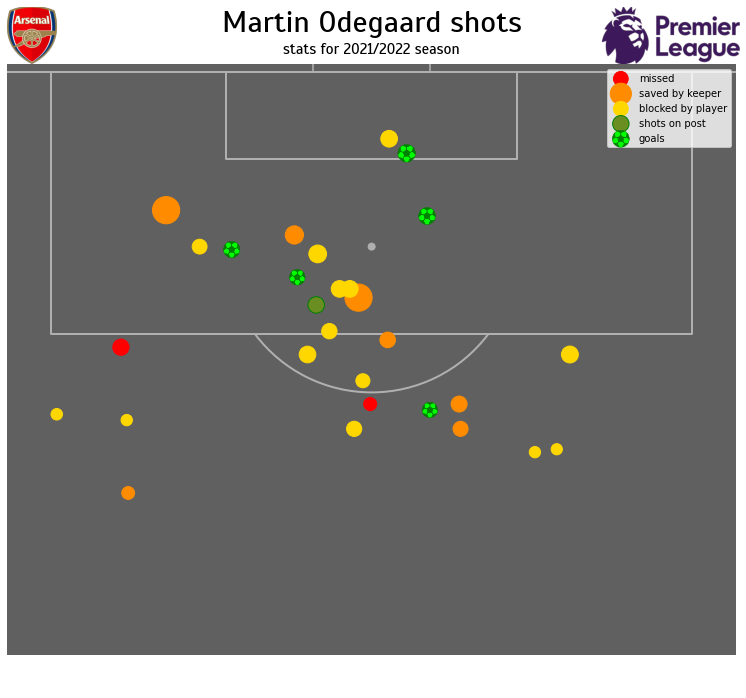

In [188]:
pitch = VerticalPitch(pad_top = 0.5, pad_bottom = -20
, pad_left = -15, pad_right = -15, half=True, goal_type='box', goal_alpha=0.8, pitch_color='#606060')

fig, axs = pitch.grid(figheight=10, title_height = 0.08, endnote_space = 0, axis = False, title_space = 0, grid_height = 0.82, endnote_height = 0.05)

sc1 = pitch.scatter(martin_missedshots.X * 100 + 20, martin_missedshots.Y * 100 - 10, s = (martin_missedshots.xG * 1900) + 100, edgecolors = 'red',
 c = 'red', hatch = '', marker = 'o', label = 'missed', ax = axs['pitch'])

sc2 = pitch.scatter(martin_savedshots.X * 100 + 20, martin_savedshots.Y * 100 - 10, s = (martin_savedshots.xG * 1900) + 100, edgecolors = 'darkorange', 
c = 'darkorange', hatch = '', marker = 'o',label = 'saved by keeper', ax = axs['pitch'])

sc3 = pitch.scatter(martin_blockedshots.X * 100 + 20, martin_blockedshots.Y * 100 -10, s = (martin_blockedshots.xG * 1900) + 100, edgecolors = 'gold',
 c = 'gold', hatch = '', marker = 'o',label = 'blocked by player', ax = axs['pitch'])

sc4 = pitch.scatter(martin_shotsonposts.X * 100 + 20, martin_shotsonposts.Y * 100 - 10, s = (martin_shotsonposts.xG * 1900) + 100, edgecolors = 'green',
 c = 'olivedrab', hatch = '', marker = 'o', label = 'shots on post', ax = axs['pitch'])

sc5 = pitch.scatter(martin_goals.X * 100 + 20, martin_goals.Y * 100 - 10, s = (martin_goals.xG * 1900) + 100, edgecolors = 'green',
 c = 'lime', hatch = '', marker = 'football', label = 'goals', ax = axs['pitch'])



axs['title'].text(0.5, 0.7, "Martin Odegaard shots", color='Black',
                  va='center', ha='center', fontproperties=fm_rubik.prop, fontsize=30)

sub_text = ('stats for 2021/2022 season')

axs['title'].text(0.5, 0.25, sub_text, color='Black',
                  va='center', ha='center', fontproperties=fm_rubik.prop, fontsize=15)

ax_arsenal_logo = add_image(arsenal_logo, fig,
                          left=axs['title'].get_position().x0,
                          bottom=axs['title'].get_position().y0,
                          height=axs['title'].get_position().height)
ax_arsenal_logo = add_image(premier_logo, fig, left=0.8,
                              bottom=axs['title'].get_position().y0,
                              height=axs['title'].get_position().height)
axs['pitch'].legend()

